# Dein erstes Rekurrentes Neuronales Netzwerk (RNN)

🙌 Willkommen zu RNNs! Nachdem wir in der vorherigen Lektion CNNs für Bilder (räumliche Daten) verwendet haben, wirst du dich jetzt mit zeitbezogenen Daten (***temporal data***) beschäftigen.

🎯 Ziele dieser Aufwärmübung:

1. Verstehen, was zeitbezogene Daten sind
2. Dein erstes Rekurrentes Neuronales Netzwerk aufbauen



_PS: No need to use Google Colab ❌_

## (1) 📚 Der Datensatz

_Hinweis: In diesem Abschnitt musst du nichts selbst programmieren, lies ihn sorgfältig durch und führe die Zellen aus. Wir möchten, dass du dich auf die RNN und LSTM Modelle konzentrierst, nicht auf einige Python-spezifische Fragen_ 😉

🔢 Stell dir vor, wir hätten Zugriff auf einige Daten über Mitarbeiter in einem Unternehmen.

In [1]:
import numpy as np

X = np.load('X.npy')
y = np.load('y.npy')

In [2]:
X.shape, y.shape

((25000, 10, 3), (25000,))

☝️ Der Datensatz beschreibt die Entwicklung des **employment status von 25 000 Mitarbeitern, Jahr für Jahr**: jede Sequenz entspricht 10 aufeinanderfolgenden Jahren, wobei jedes Jahr eine job situation beschreibt, die aus 3 Komponenten besteht
- dem salary,
- der number of people under someone's responsibility,
- der company size.

🕵🏻 Um den Datensatz etwas besser zu verstehen, schauen wir uns die Daten des ersten Mitarbeiters an.

In [3]:
import pandas as pd

employee_0 = pd.DataFrame(X[0],
                          columns=['salary',
                                   'responsibility',
                                   'company_size'])
round(employee_0,2)

,salary,responsibility,company_size
0,0.80,10.73,102.0
1,0.50,10.73,102.0
2,0.60,10.73,102.0
3,0.71,10.73,130.0
4,0.94,10.73,130.0
5,1.05,10.73,130.0
6,1.12,32.00,108.0
7,4.87,32.00,108.0
8,4.97,33.00,108.0
9,5.20,39.00,108.0


🎯 Das Ziel dieser Challenge ist es, das monatliche Gehalt im 11. Jahr für jeden dieser 25.000 Mitarbeiter basierend auf den vergangenen Beobachtungen vorherzusagen.

In [4]:
# For example, the first employee earns 6.499 k USD per month
# during the 11th year at the company
y[0]

6.499

📈 Um dir ein besseres Verständnis über die Entwicklung der Gehälter, der Anzahl der Personen unter ihrer Verantwortung und der Unternehmensgröße über die Jahre zu geben, kannst du die Zelle unten ausführen. Kannst du visuell einige Korrelationen zwischen diesen drei Variablen erkennen?

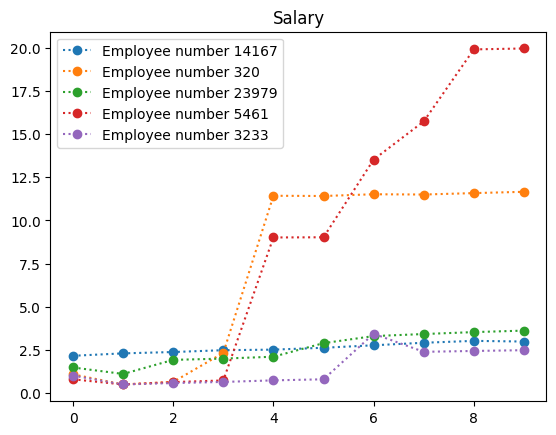

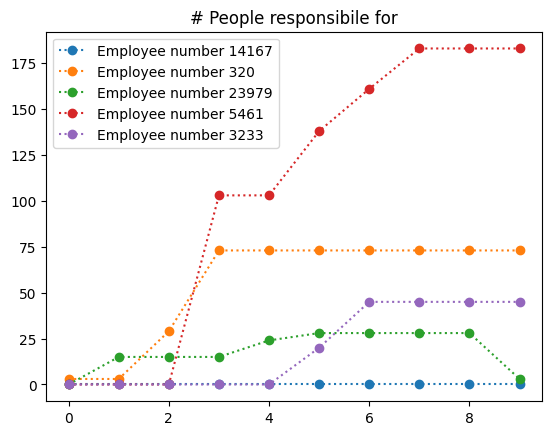

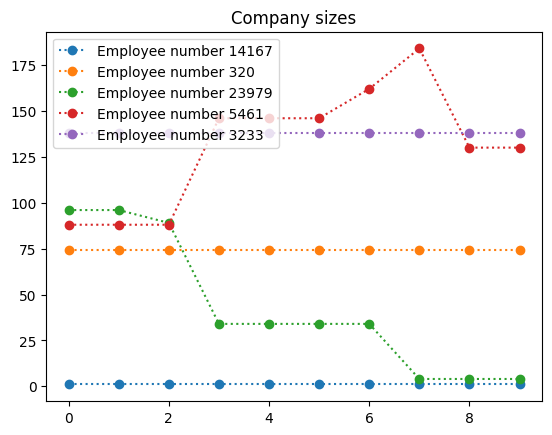

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

number_of_employees = len(X)

### Choosing random employees
##### As the employees are selected randomly, feel free to re-run this cell a few times !

number_of_randomly_selected_employees = 5

random_selection = np.random.randint(0,
                                     number_of_employees,
                                     number_of_randomly_selected_employees)


### Plotting data for the selected employees

plt.title('Salary')
for r in random_selection:
    plt.plot(X[r, :, 0],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

plt.title('# People responsibile for')
for r in random_selection:
    plt.plot(X[r, :, 1],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

plt.title('Company sizes')
for r in random_selection:
    plt.plot(X[r, :, 2],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

🕵🏻 **Datenexploration** 🕵🏻 Betrachte die Verteilung von:
* allen Gehältern im 10. Jahr,
* Personen unter jemandes Verantwortung,
* und den Unternehmensgrößen

um ein besseres Verständnis der Variabilität der Beobachtungen zu erhalten

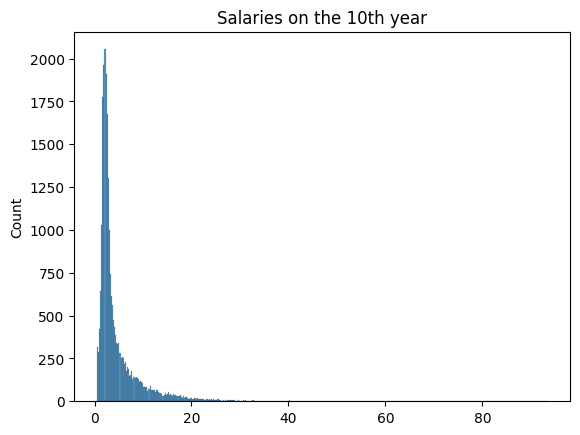

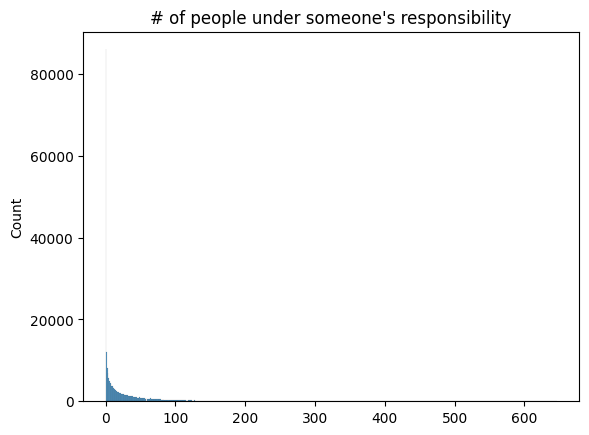

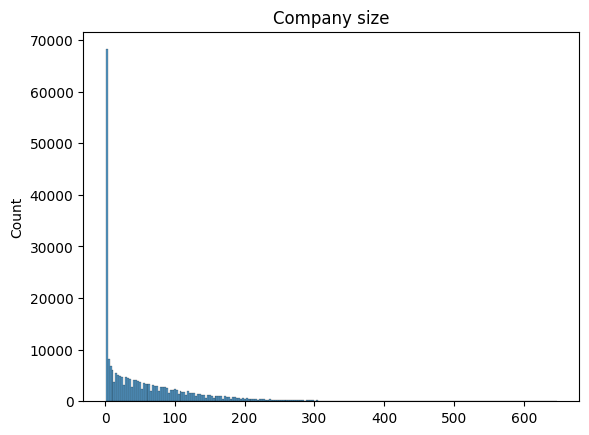

In [6]:
import seaborn as sns

plt.title("Salaries on the 10th year")
sns.histplot(X[:, -1, 0].flatten()) # all the employees, last year, feature #0 = salaries
plt.show()

plt.title("# of people under someone's responsibility")
sns.histplot(X[:, :, 1].flatten()) # all the employees, all the years, feature #1 = responsabilities
plt.show()

plt.title("Company size")
sns.histplot(X[:, :, 2].flatten()) # all the employees, all the years, feature #2 = company size
plt.show()

✂️ **Hold-out Methode** Lass uns den Datensatz in einen Trainings- und Testdatensatz aufteilen (80/20)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Notice that we are train_test_splitting the 25 000 employees!

## (2) 💻 Ein einfaches RNN

🤗 Now that you are familiar with this company's dataset, you will create your first Recurrent Neural Network. Let's start with a simple architecture.

❓ **Frage** ❓ Schreibe ein Modell, das Folgendes enthält:
- eine ***Normalization*** Layer, die an den Trainingsdatensatz angepasst ist
- eine ***SimpleRNN*** Layer mit 20 *units* (vergiss nicht, dass `tanh` besser als Aktivierungsfunktion für eine Recurrent Layer geeignet ist)
- eine ***Dense*** Layer mit 10 Neuronen
- eine ***Dense*** Layer spezifisch für deine Aufgabe (= um ein Gehalt ***vorherzusagen***)

👩🏻‍🏫 Merke: Vergiss nicht, vor der ersten Layer ein `keras.Input` hinzuzufügen.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Normalization

In [12]:
normalizer = Normalization()
normalizer.adapt(X)

# 1- RNN Architecture
model = Sequential()
model.add(Input(shape=(10, 3)))
model.add(normalizer)  # +7 Parameter
model.add(layers.SimpleRNN(units=20, activation='tanh'))
model.add(layers.Dense(10, activation="linear"))
model.add(layers.Dense(1, activation="linear"))  # Angepasst an die Vorhersage eines einzelnen Wertes (Gehalt)


❓ **Frage**: Wie viele trainierbare Parameter hat dein RNN ❓

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 10, 3)          │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 20)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 708 (2.77 KB)

 Trainable params: 701 (2.74 KB)

 Non-trainable params: 7 (32.00 B)

❓ **Frage** ❓ Versuche die Anzahl der Parameter manuell neu zu berechnen.


In [14]:
### Berechnung der Parameter für das RNN-Modell:

## 1. Normalization Layer
n_features = 3  # Anzahl der Eingabemerkmale
norm_params = n_features * 2 + 1  # 2 Parameter pro Feature (Mittelwert, Std) + 1 Bias
print(f"Normalization Layer Parameter: {norm_params}")

# 2. SimpleRNN Layer
n_units = 20  # Anzahl der RNN-Einheiten
rnn_params = n_units * (n_units + n_features + 1)  # (units * (units + input_dim + 1))
print(f"RNN Layer Parameter: {rnn_params}")

# 3. Dense Layer (10 Neuronen)
dense1_params = (n_units + 1) * 10  # (input_dim + bias) * units
print(f"Erste Dense Layer Parameter: {dense1_params}")

# 4. Output Dense Layer (1 Neuron)
dense2_params = (10 + 1) * 1  # (input_dim + bias) * units
print(f"Output Dense Layer Parameter: {dense2_params}")

# Gesamtzahl der Parameter
total_params = norm_params + rnn_params + dense1_params + dense2_params
print(f"\nGesamtzahl der trainierbaren Parameter: {total_params}")


Normalization Layer Parameter: 7
RNN Layer Parameter: 480
Erste Dense Layer Parameter: 210
Output Dense Layer Parameter: 11

Gesamtzahl der trainierbaren Parameter: 708


<details>
    <summary><i>Antwort</i></summary>


- <u> Normalization Layer</u>: 
    - Diese Schicht hat $\color{red}{n_x = 3} $ Merkmale (Gehalt, Verantwortung, Unternehmensgröße) zu normalisieren. Jedes davon erfordert die Berechnung des <font color=blue>_Mittelwerts_</font> und der <font color=blue>_Standardabweichung_</font>. Also haben wir $\color{red}{n_x = 3} \times \color{blue}{2} = 6$ nicht trainierbare Parameter. Der 7. Parameter ist ein Bias, der initial auf 0 gesetzt ist.

- <u> Recurrent Layer</u>: 
    - Wenn $\color{green}{n_h = 20} $ RNN-Einheiten parallel auf $\color{red}{n_x = 3} $ Merkmale angewendet werden, dann hat die Recurrent Layer $\color{green}{n_h}(\color{green}{n_h} + \color{red}{n_x} + 1) = \color{green}{20} \times (\color{green}{20}+\color{red}{3}+1) = \color{green}{20} \times 24 = 480$ zu trainierende Parameter.
    - Beachte, wie diese Zahl *unabhängig* von der Länge jeder Sequenz ist (hier 10 Tage)
    
- <u> Dense Layer</u>: 
    - Ausgehend von $\color{green}{n_h = 20} $ RNN-Einheiten und $1$ Bias, unter Verwendung von 10 Neuronen, hat die Dense Layer $ (\color{green}{20}+1) \times 10 = 21 \times 10 = 210$ Parameter
    
- <u> Predictive Dense Layer</u>: 
    - Ausgehend von $10$ Neuronen und $1$ Bias, unter Verwendung von 1 Neuron zur Vorhersage des 11. Gehalts, hat die Predictive Dense Layer $ (10+1) \times 1 = 11 \times 1 = 11$ Parameter
    
</details>    

❓ **Frage** ❓ Kompiliere dein Modell. Für RNN empfehlen wir dir, den ***rmsprop*** Optimizer zu verwenden (anstelle von *adam*).

In [15]:
# 2- Compilation
model.compile(loss='mse',
              optimizer='RMsprop')

❓ **Fragen** ❓ 

* Trainiere dein Modell auf deinem Trainingsdatensatz:
    * verwende einen Validierungsanteil von 20%
    * und ein Early Stopping Kriterium mit Geduld $= 5 $
* Beurteile deine Leistung auf dem Testdatensatz

In [16]:
from tensorflow.keras.callbacks import EarlyStopping  # Neu: EarlyStopping importieren

# EarlyStopping Callback definieren
early_stopping = EarlyStopping(
    monitor='val_loss',  # Überwache den Validierungsverlust
    patience=5,          # Warte 2 Epochen, bevor das Training gestoppt wird
    restore_best_weights=True  # Stelle die Gewichte der besten Epoche wieder her
)

model.fit(X_train, y_train, epochs=10000, verbose=0, validation_split=0.2 ,callbacks=[early_stopping])

## (3) 💻 Baseline-Vergleich

> ❗️ **Wichtige Erinnerung** ❗️ 
>  
> ***Denke immer daran, deine Deep Learning Modelle und allgemein jedes Machine Learning Modell mit einem Baseline-Modell zu vergleichen.***

🧑🏻‍🏫 Denk daran, dass unser Ziel die Vorhersage des Gehalts der Mitarbeiter für das 11. Jahr ist. Es handelt sich um eine ***Regression task***. Welches Baseline-Modell könnten wir erstellen? 
1. Im Fall eines traditionellen Regressionsmodells ist eine Baseline-Vorhersage für `y_test` die **Vorhersage des Durchschnitts von `y_train`**... aber diese Option könnte für zeitbezogene Reihen irrelevant sein. Theoretisch sollte das Gehalt einer Person über die Jahre hinweg steigen!
2. Eine alternative Baseline-Vorhersage für eine Regression task ist die **Vorhersage des zuletzt gesehenen Wertes**

❓ **Fragen** ❓ 
* Berechne den Mean Absolute Error eines Baseline-Modells, das vorhersagt, dass das Gehalt zwischen dem 10. und 11. Jahr konstant bleibt
* Vergleiche dieses Baseline-Modell mit deinem RNN

In [ ]:
# YOUR CODE HERE

👉 Falls du bei dieser Frage nicht weiterkommst, versuche es mit `(4) LSTM` und komme danach hierher zurück.

🧑🏻‍🏫 Frage einen TA, wenn nötig. Schau dir die Antwort nur an, wenn du bereits erfolglos versucht hast, diese Fragen zu beantworten.

<details>
    <summary><i>Antwort</i></summary>


```python
# Using the last salary in X to predict the next salary
y_test_baseline = X_test[:, -1, 0] 
mae_baseline = np.mean(np.abs(y_test - y_test_baseline))   
```
    
</details>    

😁 Du solltest bemerken, dass dein RNN etwas besser abschneidet als ein Baseline-Modell.

## (4) 💻 LSTM: Long-Short Term Memory

❓ **Fragen** ❓ 

* Schreibe das exakt gleiche Modell, aber mit einer `LSTM`-Schicht anstelle einer `SimpleRNN`-Schicht
* Beurteile die Leistung auf dem Testdatensatz

In [ ]:
# YOUR CODE HERE

💪 Das LSTM sollte etwas besser abschneiden als das SimpleRNN mit einem niedrigeren MAE.

🏁 Congratulations! You know how to train a RNN on sequential data.
 

💾 Do not forget to git add/commit/push your notebook...

🚀 ... and move to the next challenge!

---

<u>Note</u>: The sequences you worked with are totally fake. In case, you need to train and reproduce similar data, you can find below the functions that have been used to simulate such a dataset.

## 🛠 (Utils)

In [ ]:
def create_sequences(number):
    X, y = [], []

    for i in range(number):
        x_i, y_i = create_individual_sequence(10)
        X.append(x_i)
        y.append(y_i)

    return np.array(X), np.array(y)

def create_individual_sequence(length):
    company_sizes = []
    nb_persons = []
    salaries = []


    # Education level
    educ_level = [max(0, int(np.random.normal(10, 2)))]*length

    # Company size
    current_size = int(1 + np.random.beta(.4, 4)*500)
    for i in range(length):
        if not np.random.randint(4): # Change 1 out of 3 possibilities
            current_size = int(max(1, np.random.normal(current_size, 50)))
        company_sizes.append(current_size)

    # Number of persons
    nb_iter = np.random.beta(.15, 4)*300
    for i in range(length):
        if not np.random.randint(2): # Change 1 out of 2 possibilities
            R_1 = np.random.beta(0.5, 8)*3
            nb_iter = nb_iter + max(-2, R_1*company_sizes[i] + np.random.randint(-2, 2))
            nb_iter = max(0, nb_iter)
            nb_iter = int(min(company_sizes[i]-1, nb_iter))
        nb_persons.append(nb_iter)


    # Salary
    salary_iter = max(800, int(np.random.normal(1200, 300)+ 0.05*company_sizes[0] +  np.random.normal(40, 400)))
    salaries.append(salary_iter)
    for i in range(1, length + 1):
        R_1 = np.random.normal(100, 50)
        change_person = nb_persons[i-1] - nb_persons[i-2]
        change_company = max(0, company_sizes[i-1] - company_sizes[i-2])
        salary_iter = salary_iter + 0.05*change_company + change_person*R_1 + np.random.normal(100, 50)
        salary_iter = max(int(salary_iter), 500)

        salaries.append(salary_iter)

    y = salaries[-1]/1000
    salaries = [_/1000 for _ in salaries[:-1]]

    return np.array([salaries, nb_persons, company_sizes]).T, y

In [ ]:
#X, y = create_sequences(25000)

#np.save('X', X.astype(np.float32))
#np.save('y', y)